# Imports

In [466]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor,LogisticRegression
from sklearn import metrics
matplotlib.rcParams['figure.figsize'] = (10, 4)

In [525]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


# Exploratory Data Analysis

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [469]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

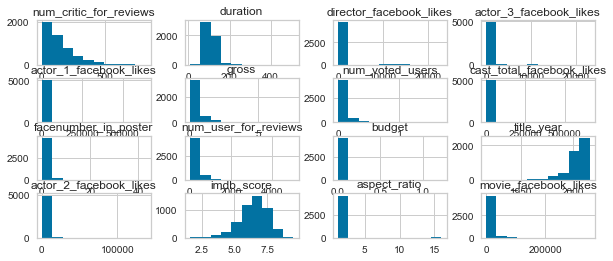

In [470]:
df.hist()

In [526]:
df["imdb_score"].isna().sum()

0

# Preprocess Data

dropping na values for imbd_score

In [521]:
df = df.dropna(subset=["imdb_score"], axis=0)
df.isna().sum().sort_values(ascending=False) / df.shape[0] * 100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
actor_2_name                  0.257783
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
imdb_score                    0.000000
movie_title                   0.000000
num_voted_users               0.000000
movie_imdb_link               0.000000
genres                        0.000000
cast_total_facebook_likes

Remove the in-between imdb_score of low and high

In [529]:
df['imdb_score'] = pd.qcut(df['imdb_score'], [0, 0.4, 0.6, 1], labels=[0,-1,1])
df = df.drop(df[df["imdb_score"] == -1].index)

<AxesSubplot:xlabel='imdb_score', ylabel='count'>

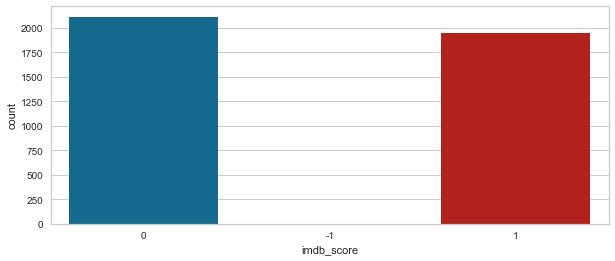

In [530]:
sns.countplot(x="imdb_score", data=df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


array([[<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>,
        <AxesSubplot:title={'center':'num_critic_for_reviews'}>],
       [<AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'title_year'}>, <AxesSubplot:>]],
      dtype=object)

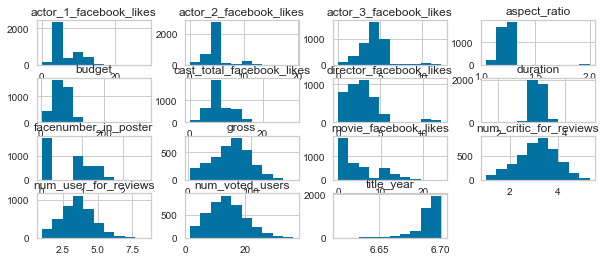

In [474]:
y = df["imdb_score"]
X = df[df.columns.difference(["imdb_score"])]
X[list(X._get_numeric_data().columns)] = X[list(X._get_numeric_data().columns)].pow(1/4)
X.hist()

In [475]:
y.head()

0    1
1    1
3    1
4    1
6    0
Name: imdb_score, dtype: category
Categories (3, int64): [0 < -1 < 1]

In [476]:
X.skew().sort_values()

title_year                  -2.314518
duration                    -0.613130
num_critic_for_reviews      -0.249052
facenumber_in_poster        -0.049683
gross                       -0.017354
num_user_for_reviews         0.330804
num_voted_users              0.407429
cast_total_facebook_likes    0.560907
actor_3_facebook_likes       0.723280
budget                       0.799051
actor_1_facebook_likes       0.809816
movie_facebook_likes         0.896084
actor_2_facebook_likes       1.269669
director_facebook_likes      1.583038
aspect_ratio                 6.427998
dtype: float64

In [477]:
X.isna().sum().sort_values(ascending=False) / len(X) * 100

gross                        19.080403
budget                       10.130317
aspect_ratio                  6.810917
content_rating                6.466683
plot_keywords                 3.319400
title_year                    2.434227
director_facebook_likes       2.335874
director_name                 2.335874
num_critic_for_reviews        1.180231
num_user_for_reviews          0.491763
actor_3_facebook_likes        0.491763
actor_3_name                  0.491763
facenumber_in_poster          0.319646
duration                      0.319646
actor_2_name                  0.295058
actor_2_facebook_likes        0.295058
language                      0.245881
actor_1_name                  0.147529
actor_1_facebook_likes        0.147529
country                       0.098353
genres                        0.000000
movie_facebook_likes          0.000000
movie_imdb_link               0.000000
movie_title                   0.000000
cast_total_facebook_likes     0.000000
num_voted_users          

# Train Test Split

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,content_rating,...,gross,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
3544,3.493788,Gordon Pinsent,3.482005,Justin Edward Seale,2.817313,John Ralston,1.238132,54.310001,4.510764,NaN,...,NaN,English,3.697945,http://www.imdb.com/title/tt4412528/?ref_=fn_t...,Two Lovers and a Bear,1.565085,1.565085,2.396782,NaN,6.700738
746,11.582922,Denzel Washington,5.612133,Radha Mitchell,4.608336,Giancarlo Giannini,1.238132,91.469122,11.958992,R,...,93.936019,English,10.877573,http://www.imdb.com/title/tt0328107/?ref_=fn_t...,Man on Fire,3.616172,5.125217,22.716785,bodyguard|journalist|kidnapping|mexico|police ...,6.690744
4301,12.178833,Peter Dinklage,10.466351,Steve Buscemi,5.574992,Romany Malco,1.238132,44.151544,13.858379,R,...,17.812461,English,4.491574,http://www.imdb.com/title/tt1276105/?ref_=fn_t...,Saint John of Las Vegas,2.590020,1.821160,7.086573,city name in title|male frontal nudity|place n...,6.694914
2097,4.930567,Carlos Ponce,4.702483,Eddie Griffin,3.421213,Charles Keating,1.166253,68.486610,6.448352,R,...,68.691527,English,5.457339,http://www.imdb.com/title/tt0367652/?ref_=fn_t...,Deuce Bigalow: European Gigolo,3.146346,3.589443,14.250399,dolphin|gigolo|pimp|serial killer|villain arre...,6.691579
3635,5.262582,Aidan Quinn,4.795832,Kendrick Cross,4.216206,Sammy Nagi Njuguna,1.166253,49.492320,6.977295,PG,...,25.142552,English,0.000000,http://www.imdb.com/title/tt1130964/?ref_=fn_t...,The 5th Quarter,2.000000,2.320596,5.940081,athletic training|football practice|funeral|gy...,6.695747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,13.049669,Leonardo DiCaprio,10.241137,Christoph Waltz,4.034702,Ato Essandoh,1.238132,100.000000,14.227798,R,...,112.957923,English,21.120941,http://www.imdb.com/title/tt1853728/?ref_=fn_t...,Django Unchained,5.259148,5.877060,31.262278,dynamite|historically inaccurate|ku klux klan|...,6.697412
2034,10.241137,Angelina Jolie Pitt,5.623413,Clea DuVall,5.474180,Vanessa Redgrave,1.166253,69.992710,10.765724,R,...,73.302059,English,0.000000,http://www.imdb.com/title/tt0172493/?ref_=fn_t...,"Girl, Interrupted",3.395963,4.429607,18.818828,1960s|father daughter incest|mental hospital|s...,6.686567
3405,10.877573,Colin Firth,5.623413,Jim Broadbent,4.130221,Gina McKee,1.238132,53.182959,11.220020,PG-13,...,32.171529,English,4.551078,http://www.imdb.com/title/tt0829098/?ref_=fn_t...,When Did You Last See Your Father?,3.080070,2.414736,7.730320,cancer|children|death|terminal cancer|time,6.693247
213,10.877573,Liam Neeson,5.623413,Jason Flemyng,5.399515,Alexa Davalos,1.238132,105.737126,11.583404,PG-13,...,113.025072,English,11.066819,http://www.imdb.com/title/tt0800320/?ref_=fn_t...,Clash of the Titans,4.306650,5.023829,21.891742,famous line|hand to hand combat|kraken|rape|zeus,6.695747


# Fill na values

In [479]:
X_train_median = X_train.select_dtypes(include='number').median()
X_train_mode = X_train.select_dtypes(include='object').mode().iloc[0]
X_train = X_train.fillna(X_train_median)
X_train = X_train.fillna(X_train_mode)
X_test = X_test.fillna(X_train_median)
X_test = X_test.fillna(X_train_mode)
X_train.isna().sum() + X_test.isna().sum()


actor_1_facebook_likes       0
actor_1_name                 0
actor_2_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
actor_3_name                 0
aspect_ratio                 0
budget                       0
cast_total_facebook_likes    0
content_rating               0
country                      0
director_facebook_likes      0
director_name                0
duration                     0
facenumber_in_poster         0
genres                       0
gross                        0
language                     0
movie_facebook_likes         0
movie_imdb_link              0
movie_title                  0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
plot_keywords                0
title_year                   0
dtype: int64

### Drop features

#### Dropping unnecessary columns such as imdb link, names

In [480]:
to_drop = [
           "actor_1_name",
           "actor_2_name",
           "actor_3_name",
           "director_name",
           "movie_imdb_link",
           "movie_title"
]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
language                      object
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

Lets take a look at some interesting features

#### Language

In [481]:
value_counts = X_train["language"].value_counts()
value_counts

English       3020
French          53
Spanish         29
Hindi           20
Mandarin        18
German          15
Japanese        10
Russian          8
Italian          7
Cantonese        7
Korean           6
Danish           5
Arabic           5
Hebrew           5
Portuguese       5
Polish           4
Chinese          3
Persian          3
Norwegian        3
Dutch            3
None             2
Zulu             2
Indonesian       2
Swedish          2
Dari             2
Thai             1
Bosnian          1
Mongolian        1
Aboriginal       1
Czech            1
Aramaic          1
Icelandic        1
Vietnamese       1
Telugu           1
Greek            1
Kannada          1
Romanian         1
Tamil            1
Kazakh           1
Name: language, dtype: int64

<AxesSubplot:xlabel='language', ylabel='count'>

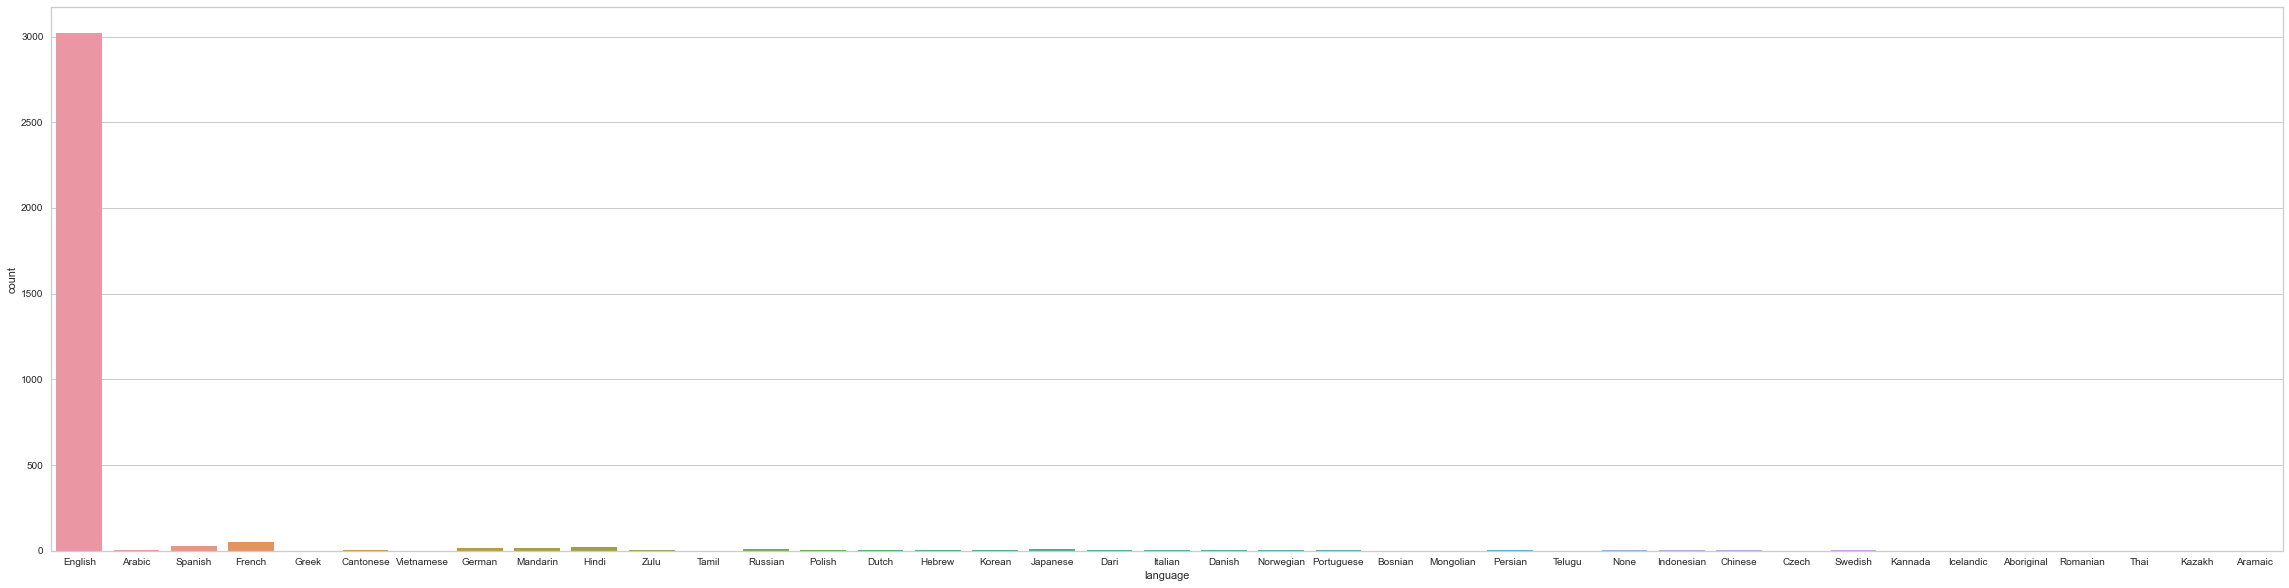

In [482]:
plt.figure(figsize=(40,10))
sns.countplot(x="language", data=X_train)

View columns in percentage

In [483]:
X_train['language'].value_counts(normalize=True) * 100

English       92.837381
French         1.629265
Spanish        0.891485
Hindi          0.614817
Mandarin       0.553335
German         0.461113
Japanese       0.307409
Russian        0.245927
Italian        0.215186
Cantonese      0.215186
Korean         0.184445
Danish         0.153704
Arabic         0.153704
Hebrew         0.153704
Portuguese     0.153704
Polish         0.122963
Chinese        0.092223
Persian        0.092223
Norwegian      0.092223
Dutch          0.092223
None           0.061482
Zulu           0.061482
Indonesian     0.061482
Swedish        0.061482
Dari           0.061482
Thai           0.030741
Bosnian        0.030741
Mongolian      0.030741
Aboriginal     0.030741
Czech          0.030741
Aramaic        0.030741
Icelandic      0.030741
Vietnamese     0.030741
Telugu         0.030741
Greek          0.030741
Kannada        0.030741
Romanian       0.030741
Tamil          0.030741
Kazakh         0.030741
Name: language, dtype: float64

English accounts for about 93%, this data is unusable since it's heavily skewed. Dropping this data is the best option

In [484]:
X_train = X_train.drop("language", axis=1)
X_test = X_test.drop("language", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Country

In [485]:
value_counts = X_train["country"].value_counts()
value_counts

USA                     2425
UK                       296
France                    98
Canada                    84
Germany                   71
Australia                 36
India                     25
China                     23
Spain                     22
Italy                     16
New Zealand               13
Japan                     12
Hong Kong                 11
Mexico                    11
South Korea               10
Ireland                    8
Denmark                    8
Russia                     8
South Africa               6
Brazil                     5
Norway                     5
Poland                     4
Netherlands                4
Israel                     4
Romania                    3
Sweden                     3
Thailand                   3
Iceland                    2
West Germany               2
Iran                       2
Belgium                    2
Argentina                  2
Switzerland                2
Bahamas                    1
Afghanistan   

View country in percentage

In [486]:
value_counts = X_train["country"].value_counts() / X_train.shape[0] * 100
value_counts

USA                     74.546572
UK                       9.099293
France                   3.012604
Canada                   2.582232
Germany                  2.182601
Australia                1.106671
India                    0.768521
China                    0.707040
Spain                    0.676299
Italy                    0.491854
New Zealand              0.399631
Japan                    0.368890
Hong Kong                0.338149
Mexico                   0.338149
South Korea              0.307409
Ireland                  0.245927
Denmark                  0.245927
Russia                   0.245927
South Africa             0.184445
Brazil                   0.153704
Norway                   0.153704
Poland                   0.122963
Netherlands              0.122963
Israel                   0.122963
Romania                  0.092223
Sweden                   0.092223
Thailand                 0.092223
Iceland                  0.061482
West Germany             0.061482
Iran          

<AxesSubplot:xlabel='country', ylabel='count'>

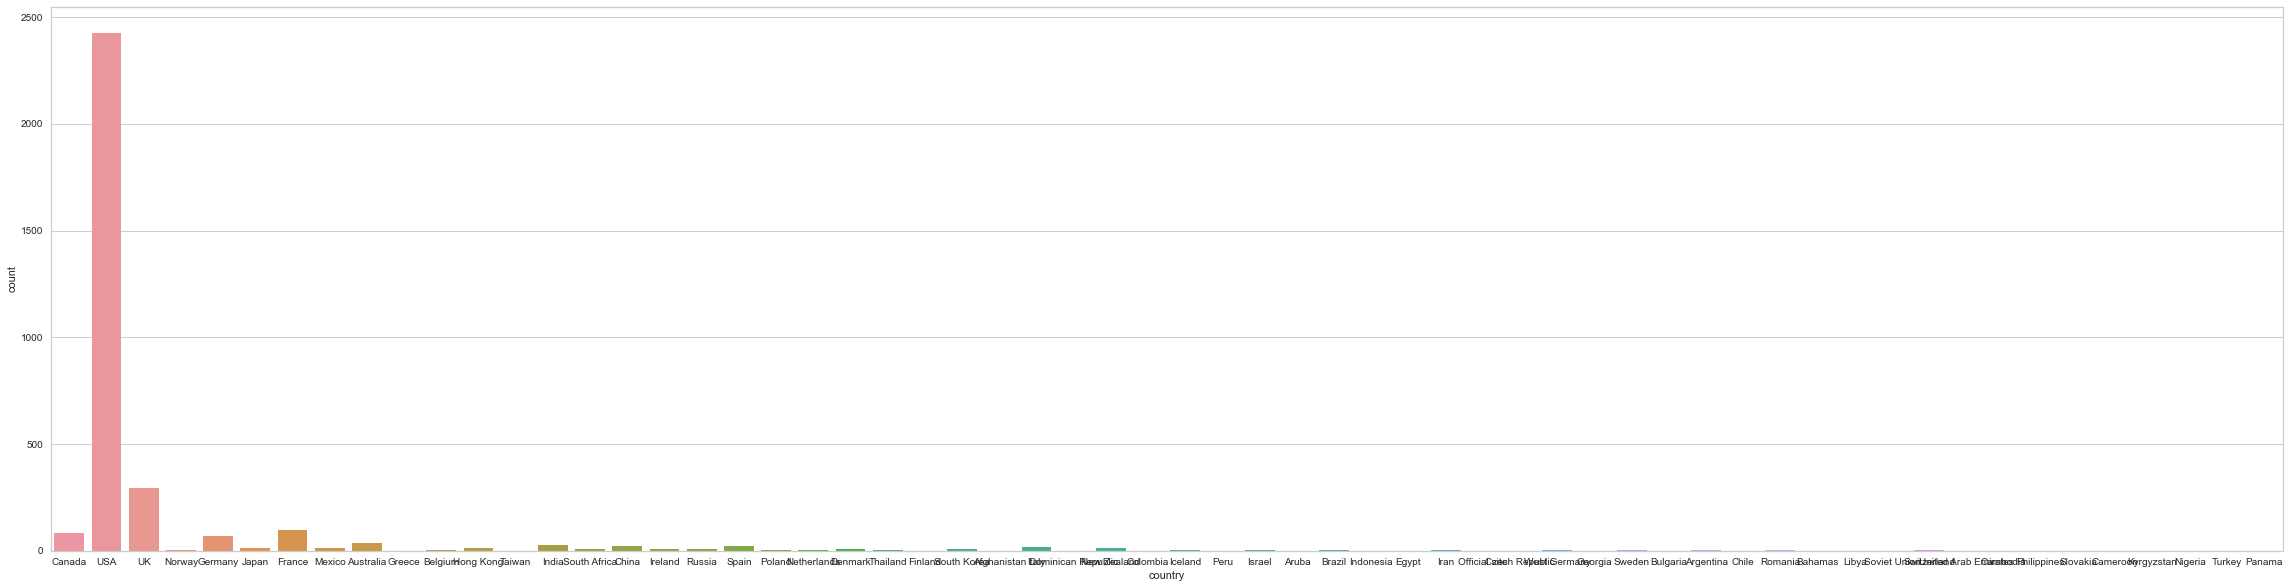

In [487]:
plt.figure(figsize=(40,10))
sns.countplot(x="country", data=X_train)

The 3 dominant countries are USA, UK, and France. Other countries should be recognized as "other" as it's less relevant than the 3

In [488]:
def process_country(X):
  top_three = ["USA","UK","France"]
  X["country"] = X["country"].where(X["country"].isin(top_three), "others")
  return X
X_train = process_country(X_train)
X_test = process_country(X_test)
X_train

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,content_rating,country,director_facebook_likes,duration,facenumber_in_poster,genres,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
3544,3.493788,3.482005,2.817313,1.238132,54.310001,4.510764,R,others,2.000000,3.130169,0.000000,Drama|Romance,70.487422,3.697945,1.565085,1.565085,2.396782,animal name in title|ape abducts a woman|goril...,6.700738
746,11.582922,5.612133,4.608336,1.238132,91.469122,11.958992,R,USA,10.466351,3.476068,1.189207,Action|Crime|Drama|Thriller,93.936019,10.877573,3.616172,5.125217,22.716785,bodyguard|journalist|kidnapping|mexico|police ...,6.690744
4301,12.178833,10.466351,5.574992,1.238132,44.151544,13.858379,R,USA,0.000000,3.036370,1.000000,Comedy|Drama,17.812461,4.491574,2.590020,1.821160,7.086573,city name in title|male frontal nudity|place n...,6.694914
2097,4.930567,4.702483,3.421213,1.166253,68.486610,6.448352,R,USA,1.189207,3.018349,0.000000,Comedy,68.691527,5.457339,3.146346,3.589443,14.250399,dolphin|gigolo|pimp|serial killer|villain arre...,6.691579
3635,5.262582,4.795832,4.216206,1.166253,49.492320,6.977295,PG,USA,1.821160,3.080070,1.189207,Biography|Drama|Sport,25.142552,0.000000,2.000000,2.320596,5.940081,athletic training|football practice|funeral|gy...,6.695747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,13.049669,10.241137,4.034702,1.238132,100.000000,14.227798,R,USA,11.246827,3.584025,1.000000,Drama|Western,112.957923,21.120941,5.259148,5.877060,31.262278,dynamite|historically inaccurate|ku klux klan|...,6.697412
2034,10.241137,5.623413,5.474180,1.166253,69.992710,10.765724,R,USA,4.595510,3.356997,0.000000,Biography|Drama,73.302059,0.000000,3.395963,4.429607,18.818828,1960s|father daughter incest|mental hospital|s...,6.686567
3405,10.877573,5.623413,4.130221,1.238132,53.182959,11.220020,PG-13,UK,1.934336,3.097041,1.189207,Biography|Drama,32.171529,4.551078,3.080070,2.414736,7.730320,cancer|children|death|terminal cancer|time,6.693247
213,10.877573,5.623413,5.399515,1.238132,105.737126,11.583404,PG-13,USA,3.996088,3.208680,0.000000,Action|Adventure|Fantasy,113.025072,11.066819,4.306650,5.023829,21.891742,famous line|hand to hand combat|kraken|rape|zeus,6.695747


#### Genres

<AxesSubplot:xlabel='genres', ylabel='count'>

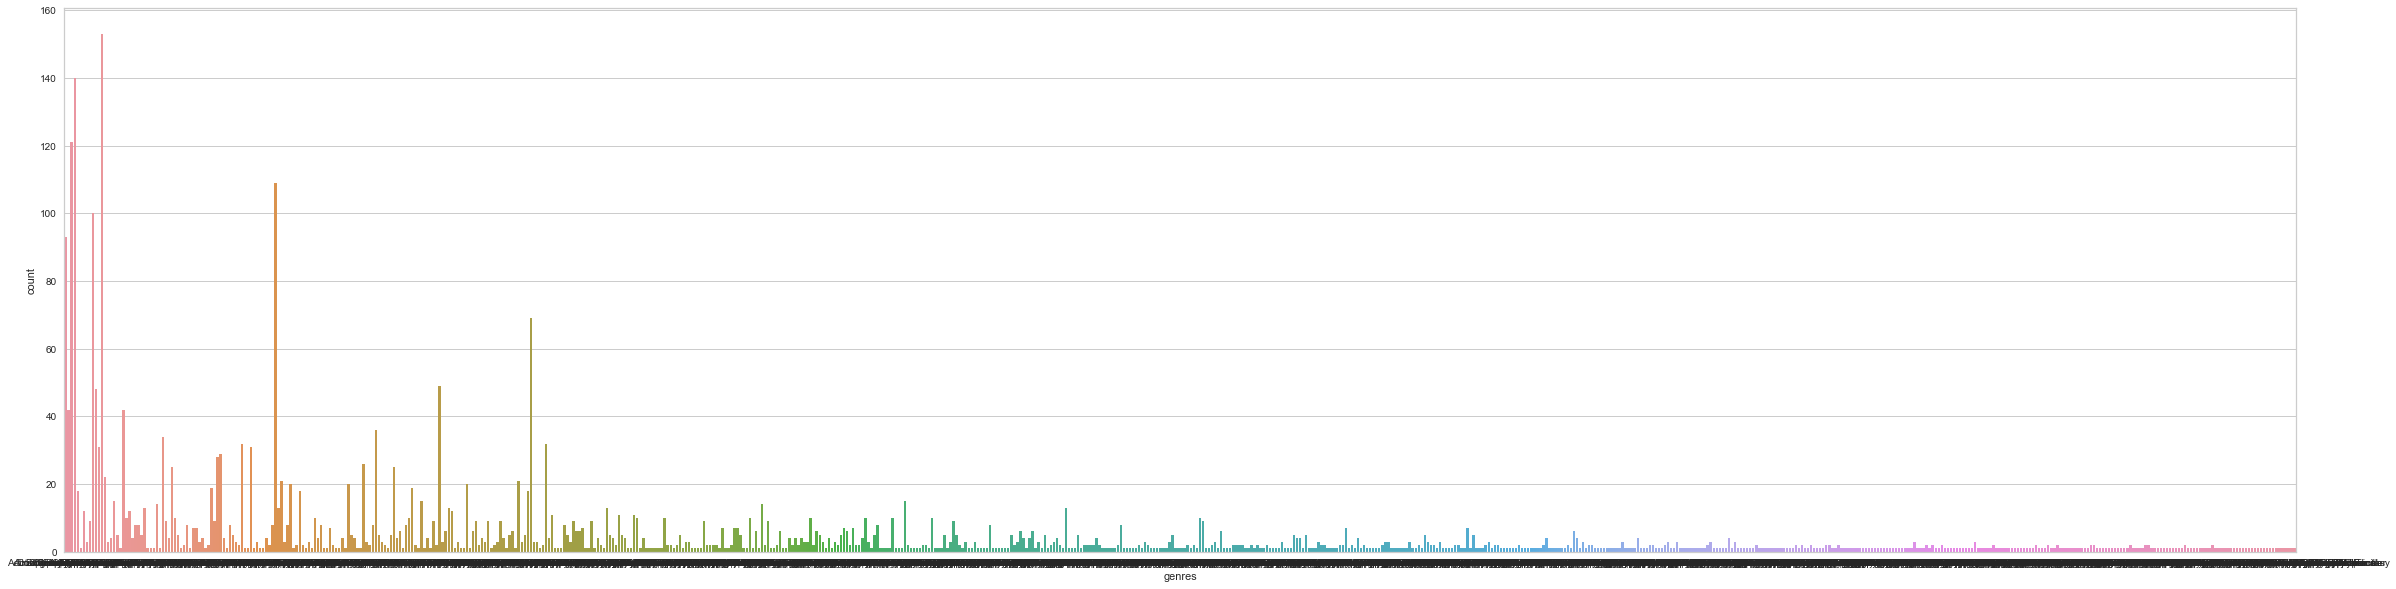

In [489]:
plt.figure(figsize=(40,10))
sns.countplot(x=X_train.genres) 

Genres are too complicated and interconnected, dropping this data as for right now

In [490]:
X_train = X_train.drop("genres", axis=1)
X_test = X_test.drop("genres",axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Content Rating

View content rating in percentage

In [491]:
value_counts = X_train["content_rating"].value_counts() / X_train.shape[0] * 100
value_counts

R            47.740547
PG-13        28.773440
PG           14.048571
Not Rated     2.305564
G             2.213342
Approved      1.137412
Unrated       1.106671
TV-14         0.707040
TV-MA         0.491854
TV-PG         0.399631
X             0.307409
TV-G          0.215186
NC-17         0.153704
Passed        0.153704
GP            0.092223
M             0.092223
TV-Y7         0.030741
TV-Y          0.030741
Name: content_rating, dtype: float64

<AxesSubplot:xlabel='content_rating', ylabel='count'>

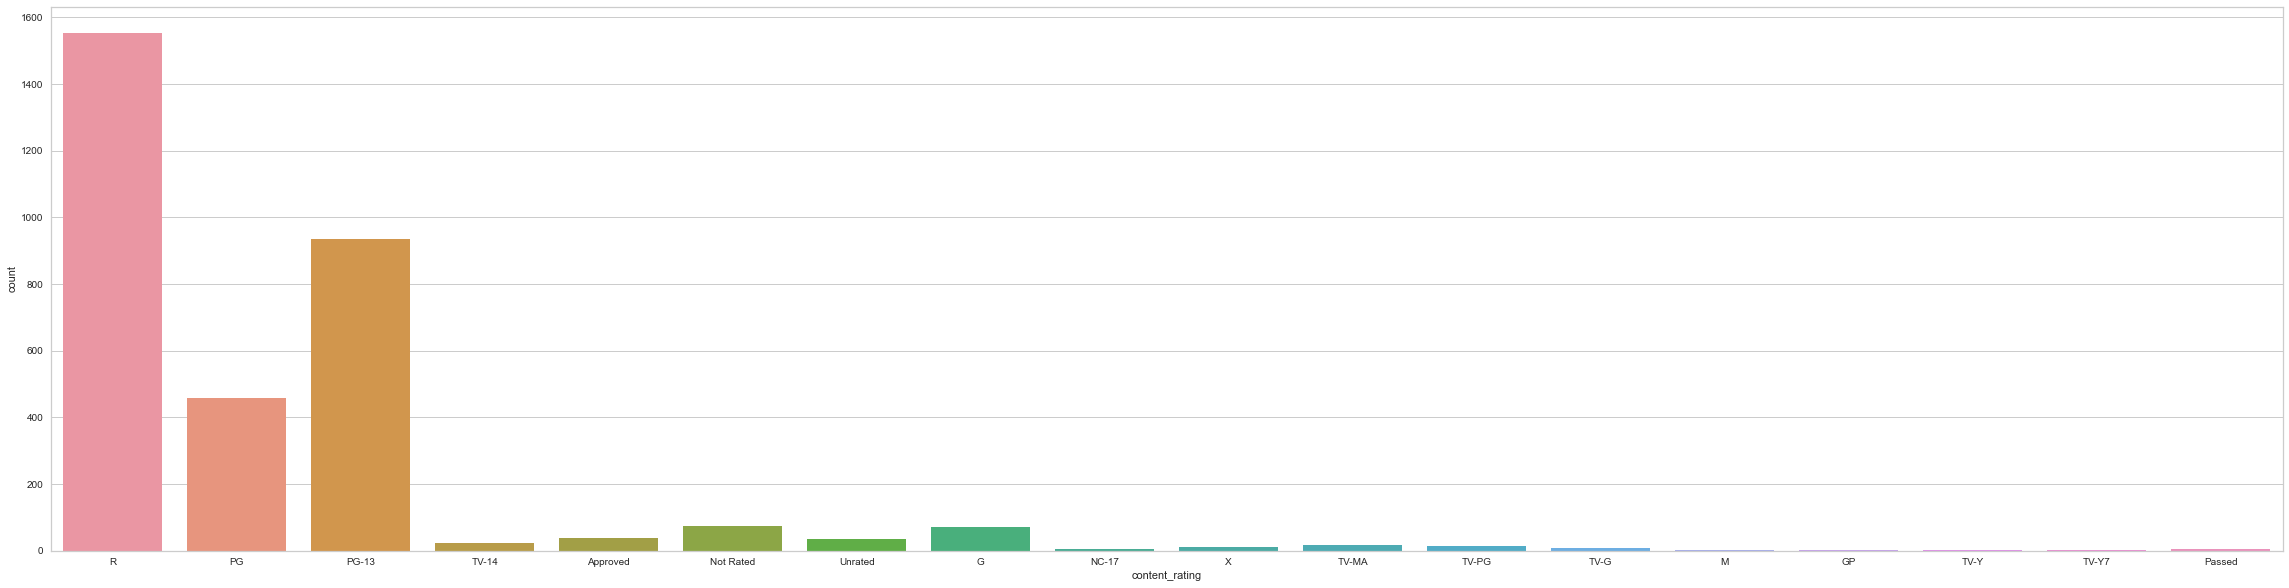

In [492]:
plt.figure(figsize=(40,10))
sns.countplot(x="content_rating", data=X_train)

R, PG, PG-13 are the 3 most dominant values in rating. Group the rest as "others"

In [493]:
def process_content_rating(X):
  top_three = ["R","PG", "PG-13"]
  X["content_rating"] = X["content_rating"].where(X["content_rating"].isin(top_three), "others")
  return X
X_train = process_content_rating(X_train)
X_test = process_content_rating(X_test)
X_train["content_rating"]

3544        R
746         R
4301        R
2097        R
3635       PG
        ...  
296         R
2034        R
3405    PG-13
213     PG-13
465     PG-13
Name: content_rating, Length: 3253, dtype: object

In [494]:
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
plot_keywords                 object
title_year                   float64
dtype: object

#### Plot keywords

In [495]:
value_counts = X_train["plot_keywords"].value_counts()
value_counts

animal name in title|ape abducts a woman|gorilla|island|king kong                               103
based on novel                                                                                    3
dress|duke|fairy godmother|fairy tale|pumpkin                                                     2
anthology|child abuse|critically acclaimed|death|grindhouse                                       2
coma|mysterious villain|police chase|shooting range|sniper                                        2
                                                                                               ... 
e mail|game|school|serial killer|student                                                          1
conspiracy|cynicism|false promise of the american dream|male full frontal nudity|male nudity      1
alien|halleys comet|life force|space vampire|vampire                                              1
bank|carnival|motorcycle|police|rookie cop                                                        1


In [496]:
#sns.countplot(x="plot_keywords", data=X_train)

Same as genres, data is too complex and interconnected. Dropping this value

In [497]:
X_train = X_train.drop("plot_keywords", axis=1)
X_test = X_test.drop("plot_keywords", axis=1)
X_train.dtypes

actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
actor_3_facebook_likes       float64
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

### Correlation

<AxesSubplot:>

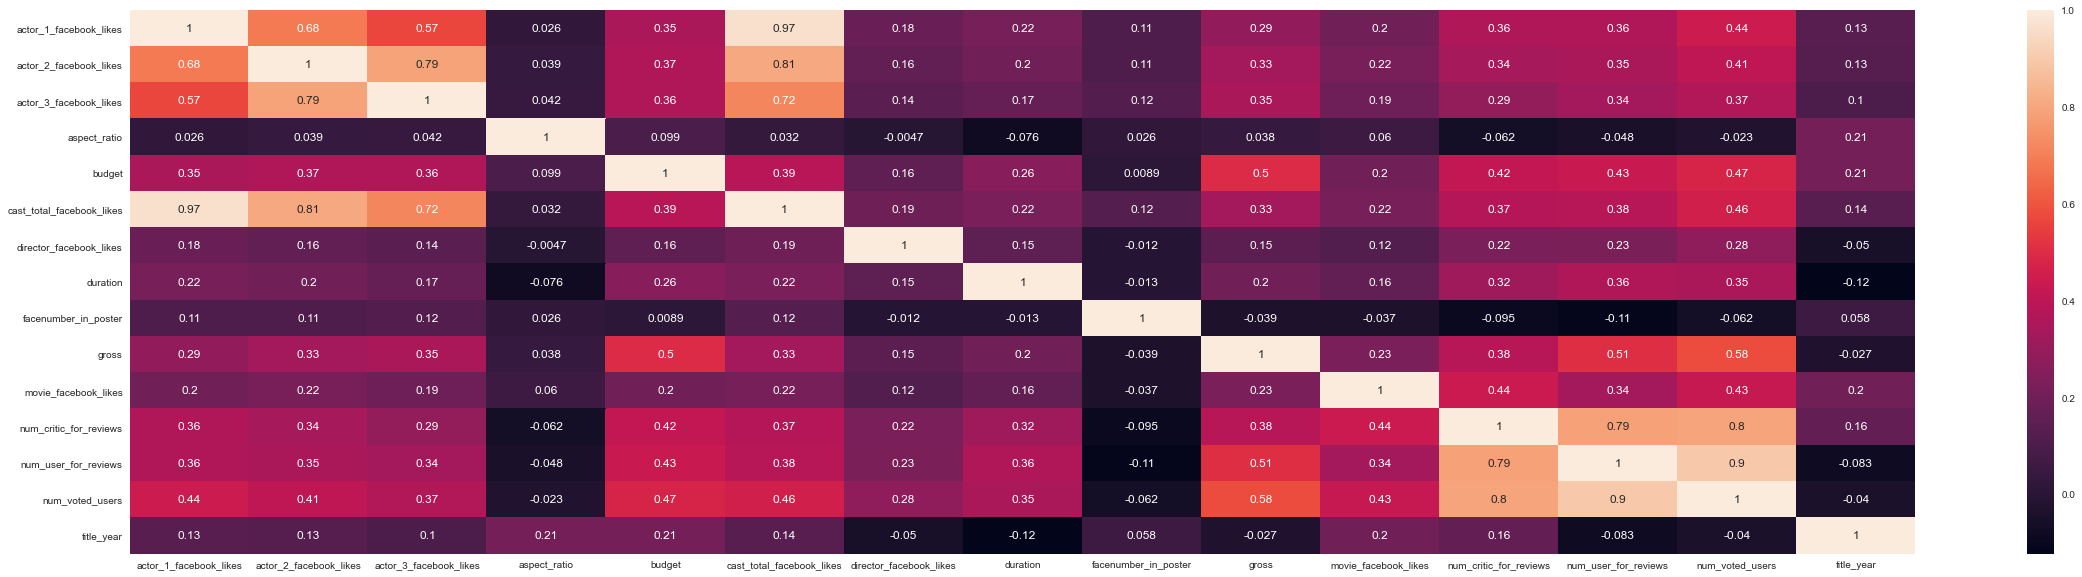

In [498]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y_train
sns.heatmap(heatmap.corr(), annot=True)

From the heatmap, several insights that were gained were
- Cast total Facebook likes and number of likes of actor 1 are highly correlated (0.97)
- Number of user for reviews and number of voted users are highly correlated (0.8)
- Number of likes of actor 2 and 3 are highly correlated (0.79)
- Total Facebook likes of actor are the representative of number of likes of actor 1,2,3

Drop actor 1,2,3 and keep the total actor facebook likes

In [499]:
def drop_actors_likes(X):
    X_copy = X.copy()
    X_copy.drop("actor_1_facebook_likes", axis=1, inplace=True)
    X_copy.drop("actor_2_facebook_likes", axis=1, inplace=True)
    X_copy.drop("actor_3_facebook_likes", axis=1, inplace=True)
    return X_copy
X_train = drop_actors_likes(X_train)
X_test = drop_actors_likes(X_test)
X_test.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users              float64
title_year                   float64
dtype: object

num_user_for_reviews over num_voted_users

In [500]:
def user_reviews_over_voted(X):
    X_copy = X.copy()
    X_copy["user_reviews_over_voted"] = X_copy["num_user_for_reviews"] / X_copy["num_voted_users"]
    X_copy.drop("num_user_for_reviews", axis=1, inplace=True)
    X_copy.drop("num_voted_users", axis=1, inplace=True)
    return X_copy
X_train = user_reviews_over_voted(X_train)
X_test = user_reviews_over_voted(X_test)
X_train.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
dtype: object

<AxesSubplot:>

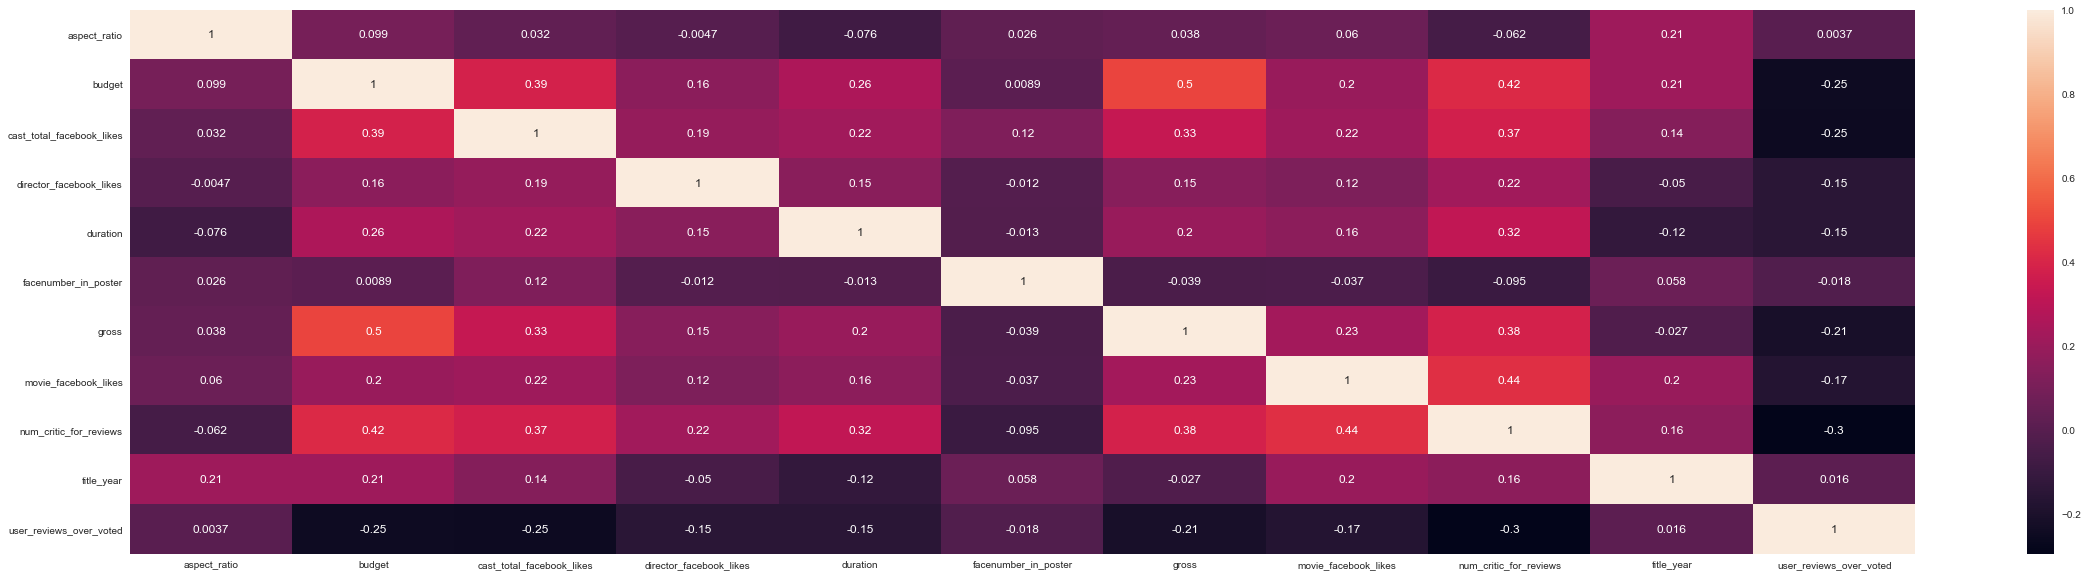

In [501]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Encoding

#### Integer to Float

In [502]:
def int_to_float(X):
    X_copy = X.copy()
    int_cols = X_copy.select_dtypes(include=["int"]).columns
    X_copy[int_cols] = X_copy[int_cols].apply(lambda x: x.astype("float"))
    return X_copy
X_train = int_to_float(X_train)
X_test = int_to_float(X_test)
X_train.dtypes


aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
content_rating                object
country                       object
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
dtype: object

#### String to One-hot

In [503]:
def one_hot_encode(X):
    X_copy = X.copy()
    cols = X_copy.select_dtypes(include=["object"]).columns
    for col in cols:
        X_copy = pd.concat([X_copy, pd.get_dummies(X_copy[col], prefix=col)], axis=1)
        X_copy.drop(col, axis=1, inplace=True)
    return X_copy
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)
X_train.dtypes

aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes    float64
director_facebook_likes      float64
duration                     float64
facenumber_in_poster         float64
gross                        float64
movie_facebook_likes         float64
num_critic_for_reviews       float64
title_year                   float64
user_reviews_over_voted      float64
content_rating_PG              uint8
content_rating_PG-13           uint8
content_rating_R               uint8
content_rating_others          uint8
country_France                 uint8
country_UK                     uint8
country_USA                    uint8
country_others                 uint8
dtype: object

In [504]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(np.array(X_train.values, dtype=float), i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                     Features   VIF
18             country_others   inf
11          content_rating_PG   inf
17                country_USA   inf
16                 country_UK   inf
15             country_France   inf
14      content_rating_others   inf
13           content_rating_R   inf
12       content_rating_PG-13   inf
8      num_critic_for_reviews  1.78
1                      budget  1.75
6                       gross  1.60
9                  title_year  1.47
2   cast_total_facebook_likes  1.45
4                    duration  1.32
7        movie_facebook_likes  1.30
10    user_reviews_over_voted  1.17
0                aspect_ratio  1.10
3     director_facebook_likes  1.09
5        facenumber_in_poster  1.06


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

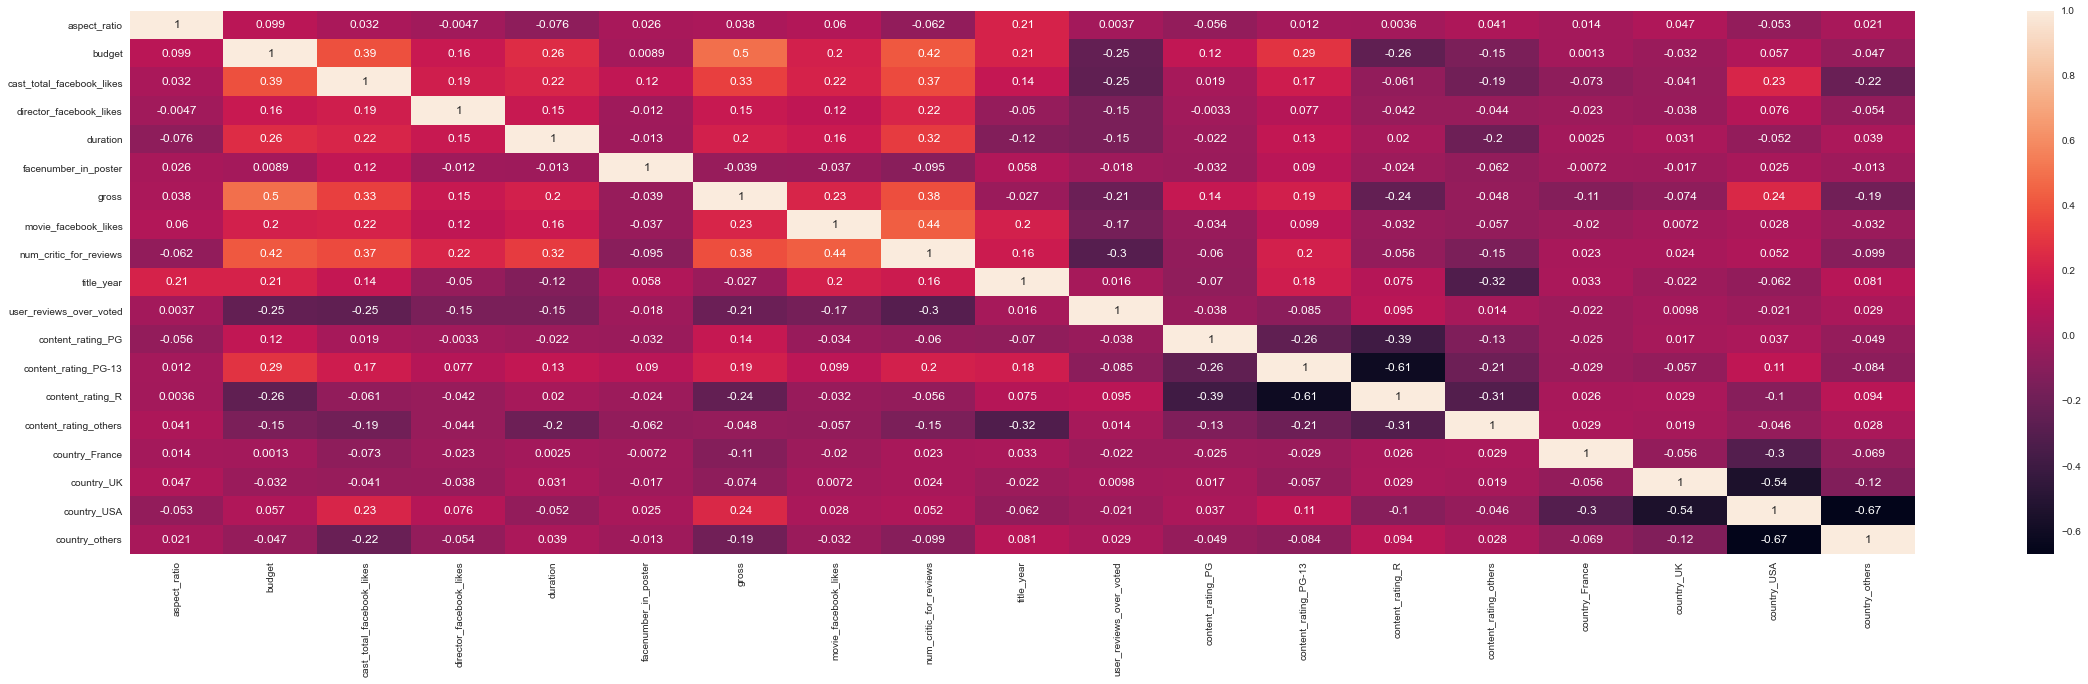

In [505]:
plt.figure(figsize=(40,10))
heatmap = X_train.copy()
heatmap["target"] = y
sns.heatmap(heatmap.corr(), annot=True)

### Normalization

In [506]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.20452595, 0.15357935, 0.15845406, ..., 0.        , 0.        ,
        1.        ],
       [0.20452595, 0.26665952, 0.42009533, ..., 0.        , 1.        ,
        0.        ],
       [0.20452595, 0.12266581, 0.486817  , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.20452595, 0.15014961, 0.39413672, ..., 1.        , 0.        ,
        0.        ],
       [0.20452595, 0.31007897, 0.4069017 , ..., 0.        , 1.        ,
        0.        ],
       [0.20452595, 0.27610857, 0.40566997, ..., 0.        , 1.        ,
        0.        ]])

# Model

In [507]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [508]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [509]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Classification Report: 
               precision    recall  f1-score   support

         low       0.73      0.83      0.77       425
        high       0.78      0.67      0.72       389

    accuracy                           0.75       814
   macro avg       0.75      0.75      0.75       814
weighted avg       0.75      0.75      0.75       814
 

Accuracy on train:   0.717 

Accuracy on test:  0.749 



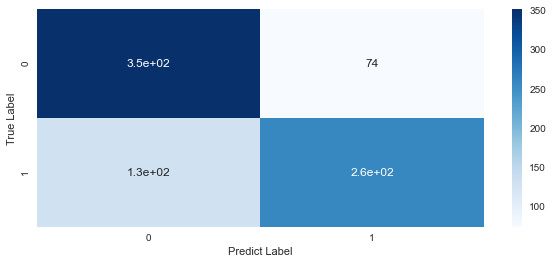

In [510]:
from sklearn import metrics
print("Classification Report: \n", metrics.classification_report(y_test,y_pred, target_names=["low","high"]),'\n')
print("Accuracy on train:  ",lr.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",lr.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [511]:
lr.intercept_

array([0.16056708])

In [512]:
lr.coef_

array([[ 1.37500884, -4.05035087, -0.41437706,  1.16966237,  3.86798698,
        -0.21893963,  0.53996573,  1.39841193,  3.26572799, -3.78948546,
        -0.38915497, -0.23263959, -0.60528724, -0.03393221,  0.86477443,
         0.23659564,  0.32550578, -0.58754672,  0.0183607 ]])

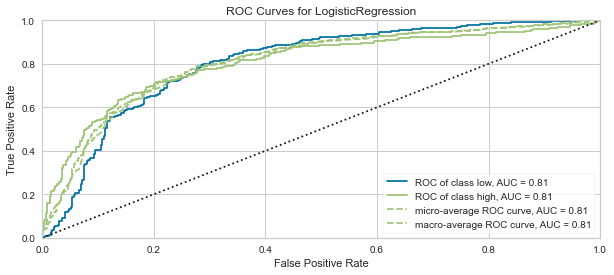

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [516]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr, classes=["low","high"])
visualizer.fit(X_train, y_train)                    # Fit the training data to the visualizer
visualizer.score(X_test, y_test.astype(int))        # Evaluate the model on the test data
visualizer.show()   

In [514]:
lr.intercept_

array([0.16056708])